In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mping
import random
import tensorflow as tf
import gdown
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import BatchNormalization, Dropout
from google.colab import files

## Автоматическая загрузка изображений Георгия и не-Георгия с драйва

In [2]:
ROOT_ID = "1OoSgfE7JhZIgdGqKXFwlU0_wiltj9aEK"
gdown.download(
  f"https://drive.google.com/uc?export=download&id={ROOT_ID}",
  "is_george.zip", quiet=False)


Downloading...
From (original): https://drive.google.com/uc?export=download&id=1OoSgfE7JhZIgdGqKXFwlU0_wiltj9aEK
From (redirected): https://drive.google.com/uc?export=download&id=1OoSgfE7JhZIgdGqKXFwlU0_wiltj9aEK&confirm=t&uuid=c8208947-84be-4253-8d67-e3073a2dacb7
To: /content/is_george.zip
100%|██████████| 617M/617M [00:09<00:00, 62.6MB/s]


'is_george.zip'

In [3]:
!unzip -q is_george.zip -d george_root

## Архитектура CNN и её обучение

Разделение на трейн и тест сеты

In [4]:
ROOT_FOLDER_DIR ='/content/george_root/is_george'
datagen = ImageDataGenerator(rescale=1/255.,
                             validation_split=0.2
                             )
train_data = datagen.flow_from_directory(ROOT_FOLDER_DIR, subset='training',
                                         target_size=(224,224),
                                         batch_size=32,
                                         class_mode='binary',
                                         seed=101,
                                         shuffle=False)
test_data = datagen.flow_from_directory(ROOT_FOLDER_DIR, subset='validation',
                                         target_size=(224,224),
                                         batch_size=32,
                                         class_mode='binary',
                                         seed=101,
                                         shuffle=False)

Found 4838 images belonging to 2 classes.
Found 1209 images belonging to 2 classes.


In [5]:
model5 = tf.keras.Sequential([
     tf.keras.layers.Conv2D(10,3,activation='relu', input_shape=(224,224,3)),
     BatchNormalization(),
     tf.keras.layers.MaxPool2D(pool_size=2),
     Dropout(0.2),
     tf.keras.layers.Conv2D(10,3,activation='relu'),
     tf.keras.layers.MaxPool2D(pool_size=2),
     Dropout(0.2),
     tf.keras.layers.Conv2D(10,3,activation='relu'),
     tf.keras.layers.MaxPool2D(pool_size=2),
     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model5.compile(loss='binary_crossentropy',
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])

In [7]:
early_stop = EarlyStopping(monitor='accuracy', patience=5, restore_best_weights=True, verbose=1)
history5 = model5.fit(train_data, epochs=40,
                      steps_per_epoch=len(train_data),
                      validation_data=test_data,
                      validation_steps=len(test_data),
                      callbacks=[early_stop])

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/40
152/152 ━━━━━━━━━━━━━━━━━━━━ 57s 330ms/step - accuracy: 0.4359 - loss: 1.4975 - val_accuracy: 0.5575 - val_loss: 0.6920
Epoch 2/40
152/152 ━━━━━━━━━━━━━━━━━━━━ 70s 285ms/step - accuracy: 0.5426 - loss: 0.6889 - val_accuracy: 0.5327 - val_loss: 0.6925
Epoch 3/40
152/152 ━━━━━━━━━━━━━━━━━━━━ 82s 287ms/step - accuracy: 0.5886 - loss: 0.6797 - val_accuracy: 0.6129 - val_loss: 0.6838
Epoch 4/40
152/152 ━━━━━━━━━━━━━━━━━━━━ 44s 290ms/step - accuracy: 0.6488 - loss: 0.6532 - val_accuracy: 0.5145 - val_loss: 0.6776
Epoch 5/40
152/152 ━━━━━━━━━━━━━━━━━━━━ 82s 289ms/step - accuracy: 0.6557 - loss: 0.6313 - val_accuracy: 0.5691 - val_loss: 0.6548
Epoch 6/40
152/152 ━━━━━━━━━━━━━━━━━━━━ 83s 297ms/step - accuracy: 0.6591 - loss: 0.6128 - val_accuracy: 0.6460 - val_loss: 0.6376
Epoch 7/40
152/152 ━━━━━━━━━━━━━━━━━━━━ 80s 286ms/step - accuracy: 0.7082 - loss: 0.5629 - val_accuracy: 0.5112 - val_loss: 0.7287
Epoch 8/40
152/152 ━━━━━━━━━━━━━━━━━━━━ 45s 293ms/step - accuracy: 0.6971 - loss: 0

## Метрики модели: accuracy на test set, кривая обучения

In [11]:
acc_result = model5.evaluate(test_data)
acc_result

38/38 ━━━━━━━━━━━━━━━━━━━━ 9s 227ms/step - accuracy: 0.6670 - loss: 0.7605


[0.616869330406189, 0.7320099472999573]

Кривая обучения


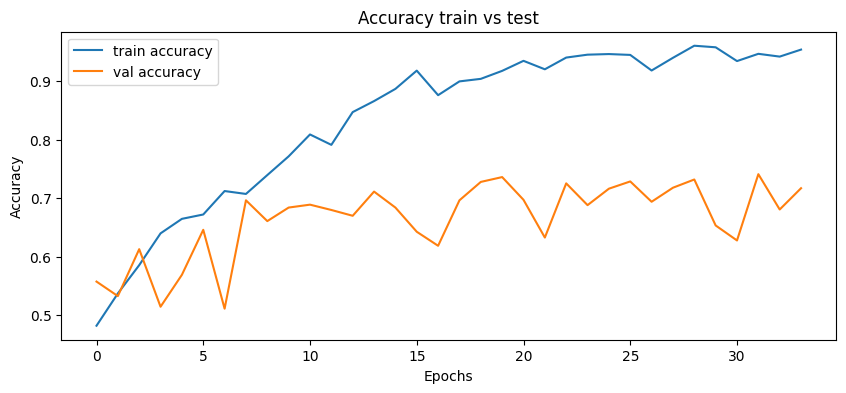

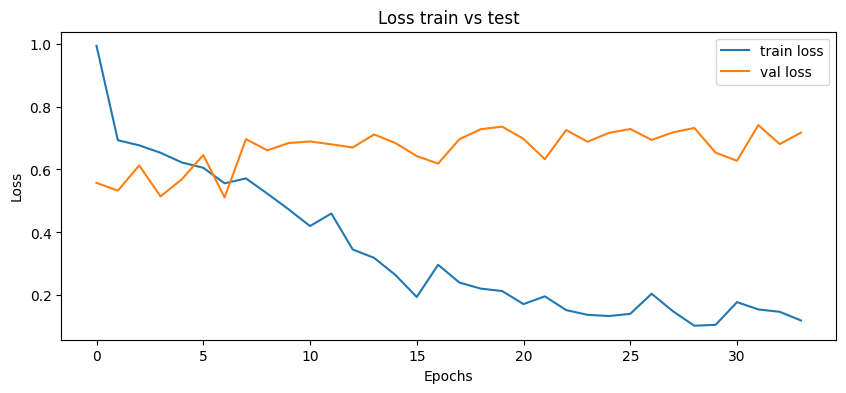

In [12]:
train_acc = history5.history['accuracy']
val_acc = history5.history['val_accuracy']
train_loss = history5.history['loss']
val_loss = history5.history['val_loss']

plt.figure(figsize=(10, 4))
plt.plot(train_acc,  label='train accuracy')
plt.plot(val_acc,label='val accuracy')
plt.title('Accuracy train vs test')
plt.xlabel('Epochs'); plt.ylabel('Accuracy')
plt.legend(); plt.show()

plt.figure(figsize=(10, 4))
plt.plot(train_loss,  label='train loss')
plt.plot(val_acc,label='val loss')
plt.title('Loss train vs test')
plt.xlabel('Epochs'); plt.ylabel('Loss')
plt.legend(); plt.show()